## Diabetes_Classification Prediction
Predict whether a person has diabetes or not.

dataset link : https://www.kaggle.com/johndasilva/diabetes

In [2]:
## import the libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') ## for ignore the warnings 

In [3]:
## load the dataset...
df = pd.read_csv("diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
655,2,155,52,27,540,38.7,0.240,25,1
1681,0,135,94,46,145,40.6,0.284,26,0
420,1,119,88,41,170,45.3,0.507,26,0
1077,2,112,86,42,160,38.4,0.246,28,0
1066,1,111,62,13,182,24.0,0.138,23,0


### EDA (Exploratory Data Analysis)

In [4]:
## check the shape..
df.shape

(2000, 9)

In [6]:
### check the datavalue type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [15]:
# Chcek null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
## Check the outliers or not... 
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


#### note outliers: 
1. I think Pregnancies 17 is outlier rare case but it's only one so ignore...
2. For a Person Glucose, BloodPressure, SkinThickness, Insulin, BMI  can not be zero...

### Data Visualization

Person which don't have diabetes :  684
Person which have diabetes :  1316


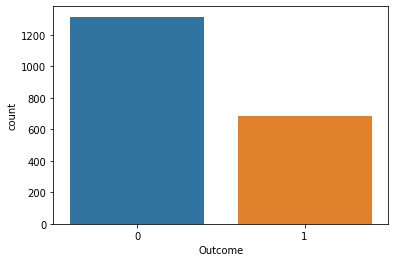

In [22]:
## check the Outcome columns for dataset are balanced or not... 
sns.countplot(df.Outcome)
print("Person which don't have diabetes : ",df[df.Outcome == 1].shape[0])
print("Person which have diabetes : ",df[df.Outcome == 0].shape[0])
## it's balanced.. 

## Data Cleaning

In [23]:
## For the zeros outliers first we change zeros to Null value for using fillna function .... ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df1 = df.copy(deep=True) ## create deep copy
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## check how many rows is null converted...
df1.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### There are several factors to consider in the data cleaning process.
    Duplicate or irrelevant observations.
    Bad labeling of data, same category occurring multiple times.
    Missing or null data points.
    Unexpected outliers.
**We are dealing with null datapoints**

##### Here are several ways to handle invalid data values :

1. Ignore/remove these cases: This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns mean to have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.

2. Put average/mean or meadian values: This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.

3. Avoid using features: It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but it's hard to predict that.

**We are go for option no. second but for second option we need to check the data distribution...**

In [33]:
### ckeck the columns
cols = df1.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

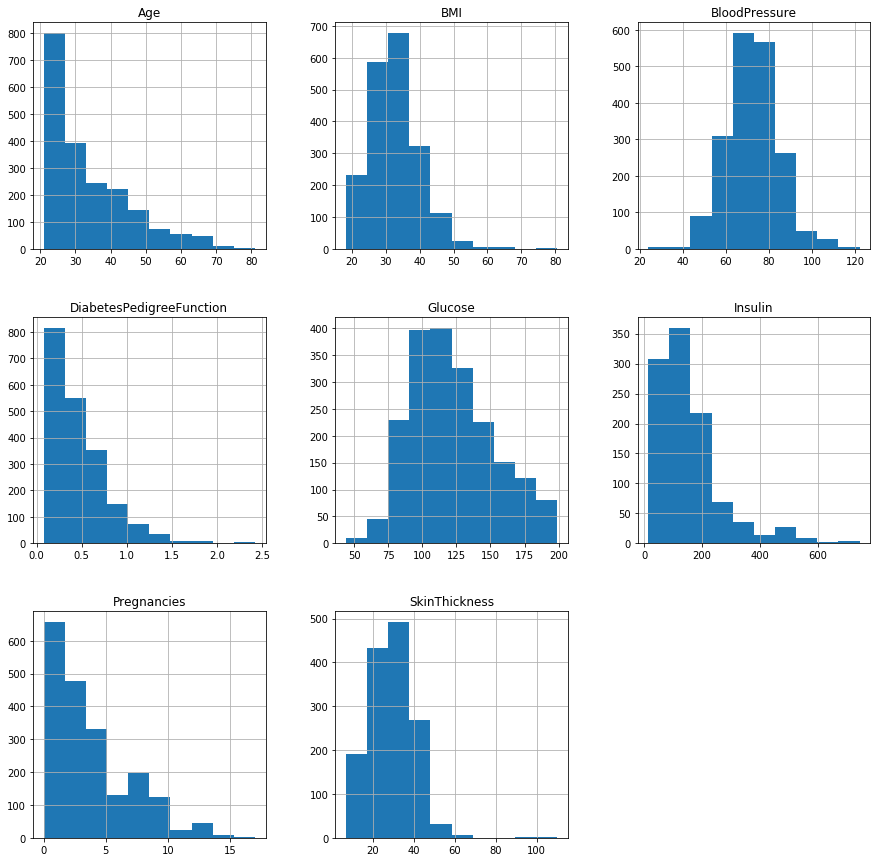

In [36]:
## data distribution visualization...
d = df1.hist(column=cols,figsize = (15,15))
# note : Glucose and BloodPressure are normal distribution so for this use mean and other for median in fillna function....

In [39]:
# Replacing NaN value by mean, median depending upon distribution
df1['Glucose'].fillna(df1['Glucose'].mean(), inplace=True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace=True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace=True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace=True)
df1['BMI'].fillna(df1['BMI'].median(), inplace=True)
### check any null value left...
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Model Selection

In [41]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns=['Outcome'],axis='columns')
y = df1['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
## Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [49]:
# Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {
        'logistic_regression' :{
            'model' : LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters' : {
                'C' : [1,5,10]
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeClassifier(splitter='best'),
            'parameters' : {
                'criterion' : ['gini','entropy'],
                'max_depth' : [5,10]
            }
        },
        'random_forest' : {
            'model' : RandomForestClassifier(criterion='gini'),
            'parameters' : {
                'n_estimators' : [10,15,20,50,100,200]
            }
        },
        'svm' : {
            'model' : SVC(gamma='auto'),
            'parameters' : {
                'C' : [1,10,20],
                'kernel' : ['rbf','linear']
            }
        }
    }
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

**Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.**

In [50]:
## check the best model..
find_best_model(X,y)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.7835
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.9220
2,random_forest,{'n_estimators': 200},0.9840
3,svm,"{'C': 1, 'kernel': 'rbf'}",0.9760


In [60]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=30, random_state=0), X_train, y_train, cv=5)
print(f'Average Accuracy : {round(sum(scores)*100/len(scores), 3)}%')

Average Accuracy : 95.25%


In [61]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=30, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Check the Random Forest model accuracy

In [62]:
## create the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[269,   0],
       [  6, 125]], dtype=int64)

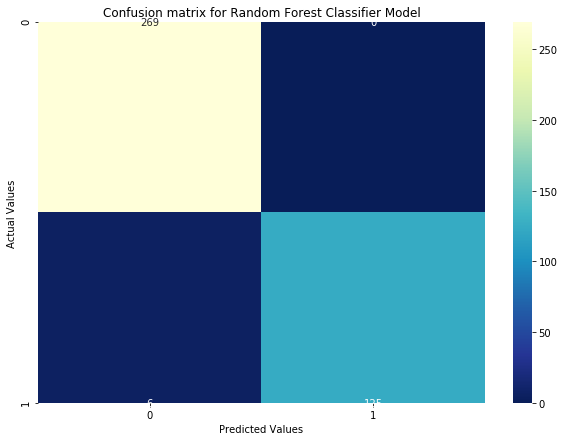

In [103]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu_r",fmt='d')
plt.title('Confusion matrix for Random Forest Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### colors info..
##### Colormap purples is not recognized. Possible values are: 
 Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [90]:
## Accuracy of the model and classification report
print(f"Accuracy : {accuracy_score(y_test,y_pred)*100}%")
print("*"*50)
print(classification_report(y_test,y_pred))

Accuracy : 98.5%
**************************************************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       269
           1       1.00      0.95      0.98       131

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



## Predictions 

In [92]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [98]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [99]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Oops! You have diabetes.


In [100]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Great! You don't have diabetes.
